In [10]:
import numpy as np
import datasets
import pickle
import pathlib
import os
from scipy import stats
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
from datasets import load_dataset

configs = {
    "sst2": {
        "globenc_path": lambda epoch : f"/home/modaresi/projects/globenc_analysis/outputs/globencs_elementwise/sst2-e{epoch}_train_bert-base-uncased.pickle",
        "logits_path": "/home/modaresi/projects/globenc_analysis/outputs/models/output_sst2_bert-base-uncased_0001_SEED0042/training_dynamics_after_step/",
        "hf_ds": "sst2",
    },
    "mnli": {
        "globenc_path": lambda epoch : f"/home/modaresi/projects/globenc_analysis/outputs/globencs_elementwise/mnli-e{epoch}_train_bert-base-uncased.pickle",
        "logits_path": "/home/modaresi/projects/globenc_analysis/outputs/models/output_mnli_bert-base-uncased_0001_SEED0042/training_dynamics_after_epoch",
        "hf_ds": "mnli",
    }
}

CONFIG = configs["sst2"]  # sst2/mnli

In [11]:
def load_pickle(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    print(f"Read {path}")
    return data

In [12]:
globencs = list()  # [epoch, {globenc, tokens}, #]
for epoch in tqdm(range(6)):
    data = load_pickle(CONFIG["globenc_path"](epoch))
    globencs.append(data)

  0%|          | 0/6 [00:00<?, ?it/s]

Read /home/modaresi/projects/globenc_analysis/outputs/globencs_elementwise/sst2-e0_train_bert-base-uncased.pickle
Read /home/modaresi/projects/globenc_analysis/outputs/globencs_elementwise/sst2-e1_train_bert-base-uncased.pickle
Read /home/modaresi/projects/globenc_analysis/outputs/globencs_elementwise/sst2-e2_train_bert-base-uncased.pickle
Read /home/modaresi/projects/globenc_analysis/outputs/globencs_elementwise/sst2-e3_train_bert-base-uncased.pickle
Read /home/modaresi/projects/globenc_analysis/outputs/globencs_elementwise/sst2-e4_train_bert-base-uncased.pickle
Read /home/modaresi/projects/globenc_analysis/outputs/globencs_elementwise/sst2-e5_train_bert-base-uncased.pickle


In [13]:
sals = np.load("sst2_train_sals.npy")
sals.shape

(67349, 64)

In [25]:
spearmans = []
for i in tqdm(range(len(sals))):
    globenc_i = globencs[-1]["globenc"][i][0]
    length = min(len(globenc_i), 64)
    spearmans.append(stats.spearmanr(sals[i, 1:length], globenc_i[1:length])[0])

  0%|          | 0/67349 [00:00<?, ?it/s]

<AxesSubplot:>

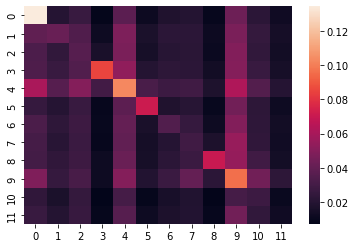

In [31]:
from seaborn import heatmap

heatmap(globencs[-1]["globenc"][120])